<a href="https://colab.research.google.com/github/aryanntated/Mumbai_AQI_Analysis/blob/main/TSA_MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mumbai Air quality Time series Analysis


### Dataset

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('ChhatrapatiShivajiIntlAirportT2MumbaiMPCB.csv', parse_dates = True)
df.head()

,Unnamed: 0,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,...,Toluene,Eth-Benzene,MP-Xylene,RH,WS,WD,SR,BP,AT,TOT-RF
0,0,2021-01-01 00:00:00,2021-01-01 00:15:00,81.27,251.00,74.94,50.55,125.48,40.01,9.95,...,NaN,10.81,6.30,68.88,0.33,197.47,NaN,NaN,25.20,0.0
1,1,2021-01-01 00:15:00,2021-01-01 00:30:00,81.00,251.00,75.58,49.01,124.60,41.14,11.93,...,NaN,6.71,11.93,68.75,0.20,227.29,NaN,NaN,25.07,0.0
2,2,2021-01-01 00:30:00,2021-01-01 00:45:00,81.00,251.00,86.29,45.26,131.55,40.99,12.48,...,NaN,14.83,5.89,70.34,0.21,224.37,NaN,NaN,24.85,0.0
3,3,2021-01-01 00:45:00,2021-01-01 01:00:00,81.00,270.44,99.42,37.85,137.30,41.56,13.55,...,NaN,14.27,6.84,74.45,0.24,182.25,NaN,NaN,24.70,0.0
4,4,2021-01-01 01:00:00,2021-01-01 01:15:00,96.47,305.00,105.88,36.26,142.14,40.86,13.17,...,NaN,13.85,7.76,78.17,0.25,207.07,NaN,NaN,24.51,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76321 entries, 0 to 76320
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   76321 non-null  int64  
 1   From Date    76321 non-null  object 
 2   To Date      76321 non-null  object 
 3   PM2.5        67063 non-null  float64
 4   PM10         72314 non-null  float64
 5   NO           61100 non-null  float64
 6   NO2          59965 non-null  float64
 7   NOx          61375 non-null  float64
 8   NH3          58098 non-null  float64
 9   SO2          64432 non-null  float64
 10  CO           63566 non-null  float64
 11  Ozone        64808 non-null  float64
 12  Benzene      61363 non-null  float64
 13  Toluene      0 non-null      float64
 14  Eth-Benzene  43876 non-null  float64
 15  MP-Xylene    40819 non-null  float64
 16  RH           60527 non-null  float64
 17  WS           60523 non-null  float64
 18  WD           60532 non-null  float64
 19  SR  

In [ ]:
df.shape

(76321, 23)

In [ ]:
df.isnull().sum()/len(df)*100

Unnamed: 0       0.000000
From Date        0.000000
To Date          0.000000
PM2.5           12.130344
PM10             5.250193
NO              19.943397
NO2             21.430537
NOx             19.583077
NH3             23.876784
SO2             15.577626
CO              16.712307
Ozone           15.084970
Benzene         19.598800
Toluene        100.000000
Eth-Benzene     42.511235
MP-Xylene       46.516686
RH              20.694173
WS              20.699414
WD              20.687622
SR              99.879457
BP              40.285112
AT              20.905124
TOT-RF           0.000000
dtype: float64

In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
for column in missing_percentage.index:
    if missing_percentage[column] > 50:
        df.drop(column, axis=1, inplace=True)

In [ ]:
df.isnull().sum()/len(df)*100

Unnamed: 0      0.000000
From Date       0.000000
To Date         0.000000
PM2.5          12.130344
PM10            5.250193
NO             19.943397
NO2            21.430537
NOx            19.583077
NH3            23.876784
SO2            15.577626
CO             16.712307
Ozone          15.084970
Benzene        19.598800
Eth-Benzene    42.511235
MP-Xylene      46.516686
RH             20.694173
WS             20.699414
WD             20.687622
BP             40.285112
AT             20.905124
TOT-RF          0.000000
dtype: float64

In [ ]:
# Keeping the gases:
drop_col = ['Unnamed: 0','Eth-Benzene', 'MP-Xylene', 'RH', 'WS', 'WD', 'BP', 'AT']
df.drop(drop_col, axis = 1, inplace = True)

In [ ]:
df.isnull().sum()/len(df)*100

From Date     0.000000
To Date       0.000000
PM2.5        12.130344
PM10          5.250193
NO           19.943397
NO2          21.430537
NOx          19.583077
NH3          23.876784
SO2          15.577626
CO           16.712307
Ozone        15.084970
Benzene      19.598800
TOT-RF        0.000000
dtype: float64

In [ ]:
df_new = df.dropna(axis = 0)

In [ ]:
df_new.shape

(50259, 13)

In [ ]:
df_new.reset_index(drop = True, inplace = True)

### Exp 1 - Trends

In [ ]:
!pip install statsmodels

In [ ]:
df_new['From Date'] = pd.to_datetime(df_new['From Date'])
df_new.set_index('From Date', inplace = True)
df_resampled = df_new.resample('D').mean()

<ipython-input-13-a4981a865d19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['From Date'] = pd.to_datetime(df_new['From Date'])
<ipython-input-13-a4981a865d19>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df_new.resample('D').mean()


In [ ]:
df = df_resampled.dropna(axis = 0)

In [ ]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,TOT-RF
From Date,,,,,,,,,,,
2021-01-01,80.628235,253.169294,61.451882,45.391412,106.845059,39.507765,12.356118,1.684000,49.204353,0.343529,0.0
2021-01-02,60.324000,217.973444,68.595222,42.766222,111.362222,32.152000,16.214333,1.621222,47.811333,1.607556,0.0
2021-01-03,47.535490,176.007647,62.467255,52.331961,114.802353,16.856078,14.759608,1.260196,52.356863,5.720000,0.0
2021-01-04,41.851154,133.847821,61.600128,5.541026,67.142179,26.658333,11.156154,0.382564,14.068333,1.256282,0.0
2021-01-05,22.295313,55.153438,29.949844,16.743906,46.695000,2.850625,1.183750,0.319531,14.945312,2.121719,0.0


In [ ]:
df.shape

(753, 11)

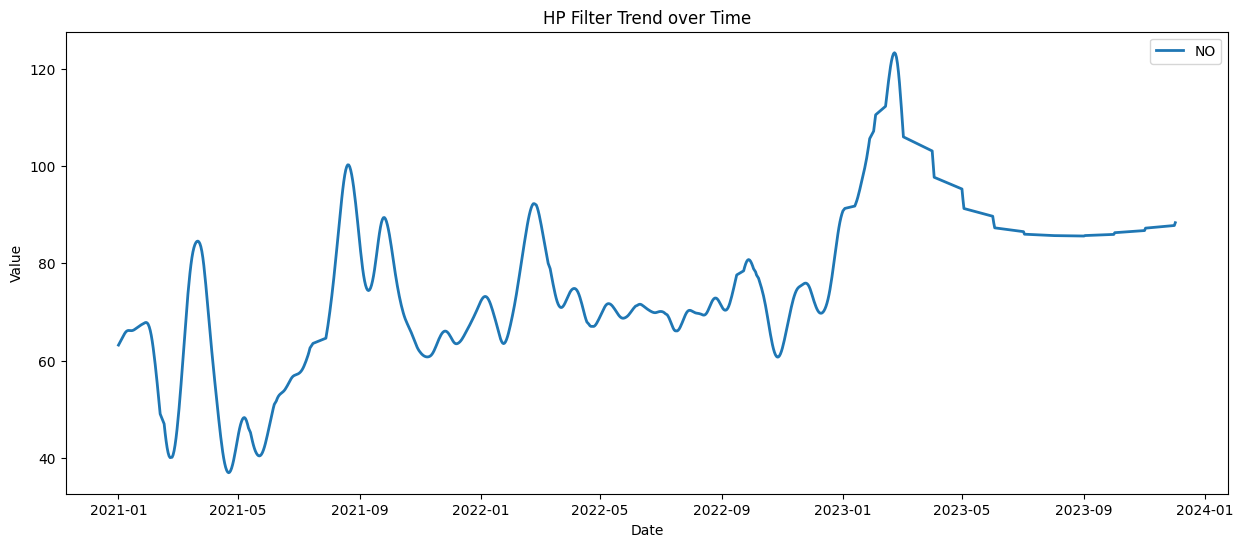

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
df.index = pd.to_datetime(df.index)
cycle, trend = sm.tsa.filters.hpfilter(df['NO'], lamb=1600)

# Plot the trend
plt.figure(figsize=(15, 6))
plt.plot(df.index, trend, label='NO', linewidth=2)
plt.title('HP Filter Trend over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

### Detrending

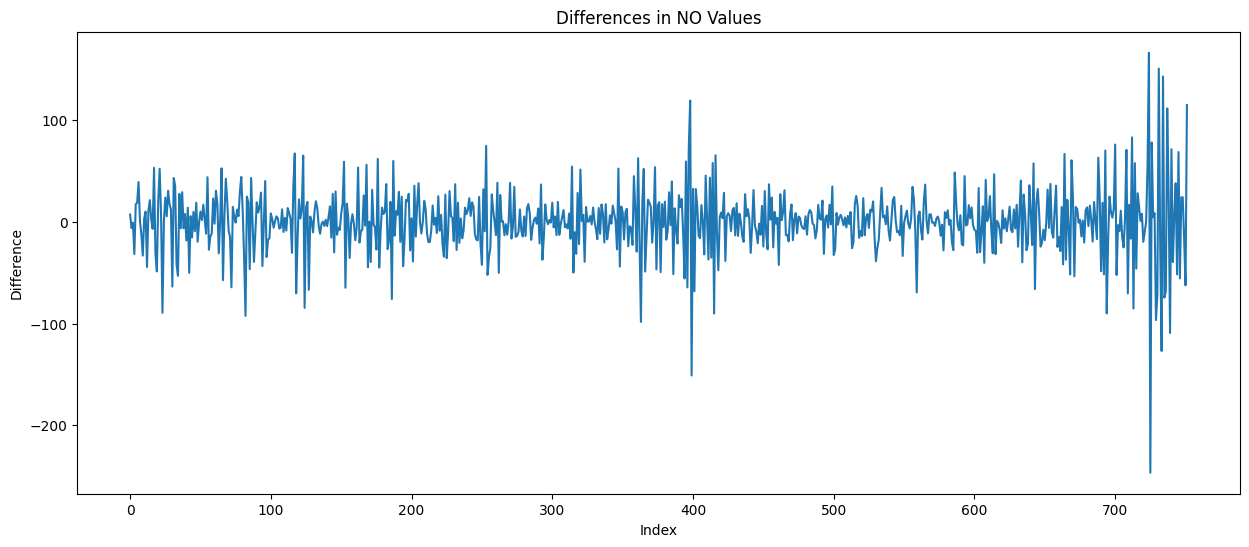

In [ ]:
x = df['NO'].values
diff = list()
for i in range(1, len(x)):
  value = x[i] - x[i - 1]
  diff.append(value)
plt.figure(figsize=(15, 6))
plt.plot(diff)
plt.title('Differences in NO Values')
plt.xlabel('Index')
plt.ylabel('Difference')
plt.show()

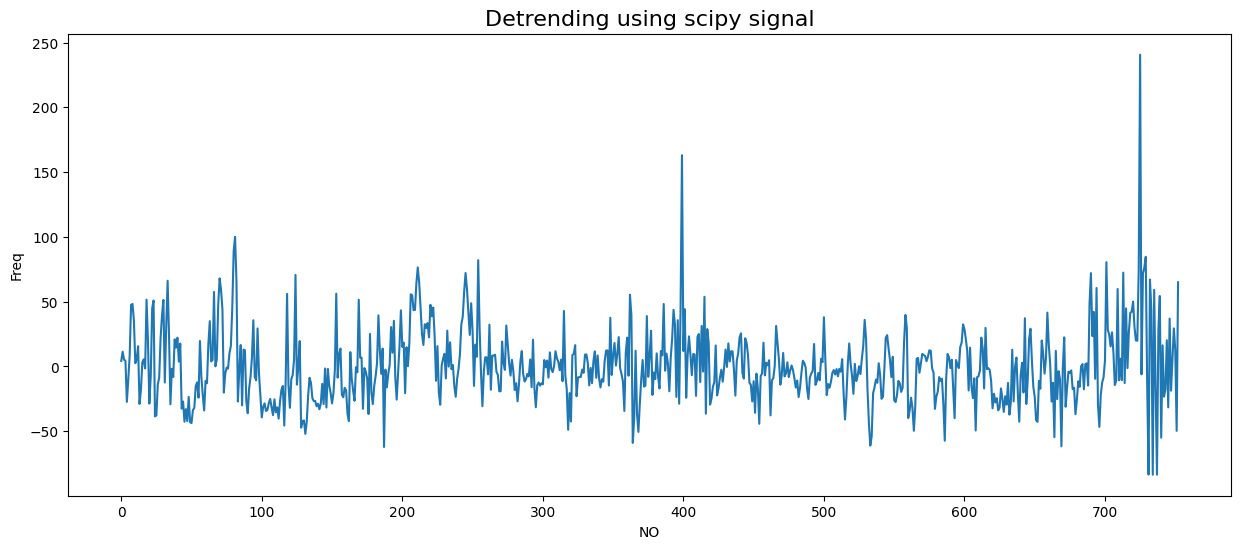

In [ ]:
from scipy import signal
import warnings

warnings.filterwarnings("ignore")
detrended = signal.detrend(x)
plt.figure(figsize = (15,6))
plt.plot(detrended)
plt.xlabel('NO')
plt.ylabel('Freq')
plt.title('Detrending using scipy signal', fontsize=16)
plt.show()

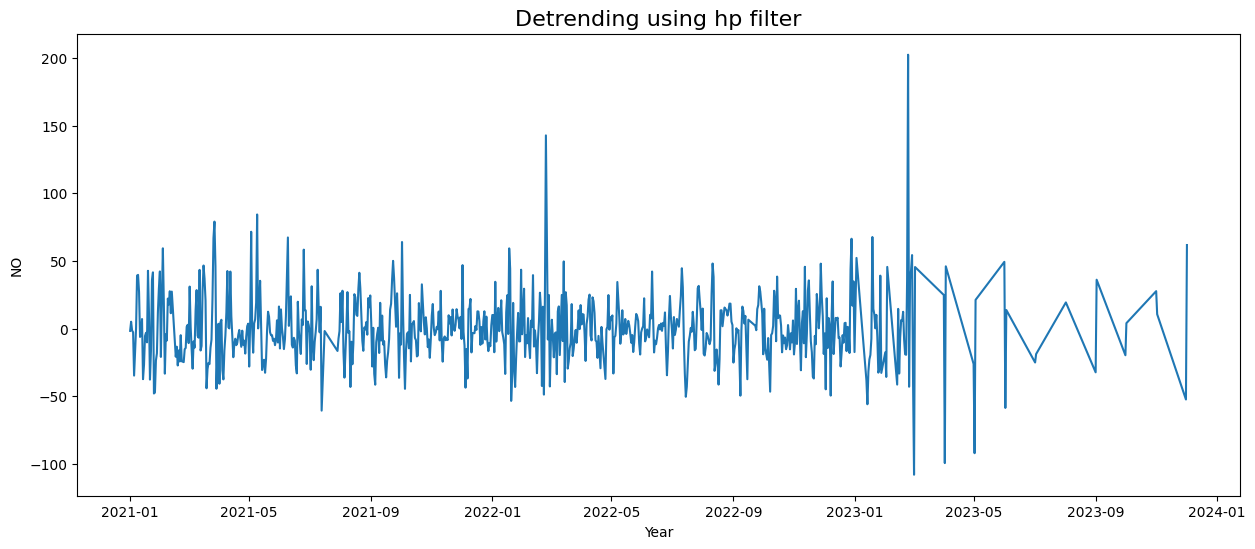

In [ ]:
cycle, trend = sm.tsa.filters.hpfilter(df['NO'], lamb=1600)
df['trend_NO'] = trend
detrended = df.NO - df.trend_NO
plt.figure(figsize = (15,6))
plt.plot(detrended)
plt.title("Detrending using hp filter", fontsize = 16)
plt.xlabel('Year')
plt.ylabel("NO")
plt.show()

### EXP 2 - Seasonality

In [ ]:
df.head(5)

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,TOT-RF,trend_NO
From Date,,,,,,,,,,,,
2021-01-01,80.628235,253.169294,61.451882,45.391412,106.845059,39.507765,12.356118,1.684000,49.204353,0.343529,0.0,63.205166
2021-01-02,60.324000,217.973444,68.595222,42.766222,111.362222,32.152000,16.214333,1.621222,47.811333,1.607556,0.0,63.589240
2021-01-03,47.535490,176.007647,62.467255,52.331961,114.802353,16.856078,14.759608,1.260196,52.356863,5.720000,0.0,63.972218
2021-01-04,41.851154,133.847821,61.600128,5.541026,67.142179,26.658333,11.156154,0.382564,14.068333,1.256282,0.0,64.356133
2021-01-05,22.295313,55.153438,29.949844,16.743906,46.695000,2.850625,1.183750,0.319531,14.945312,2.121719,0.0,64.742078


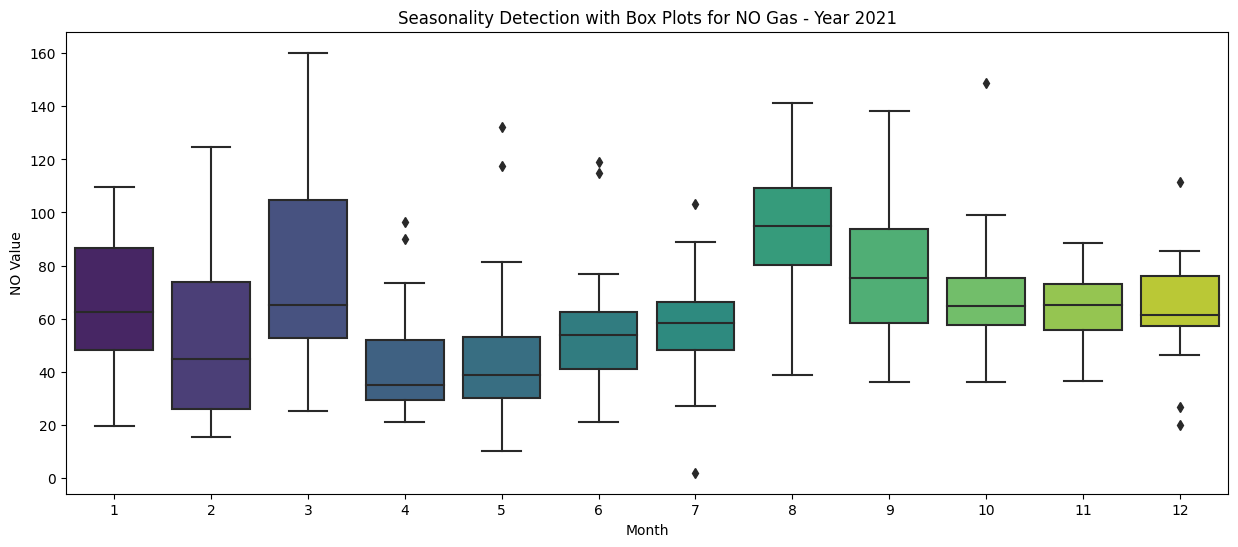

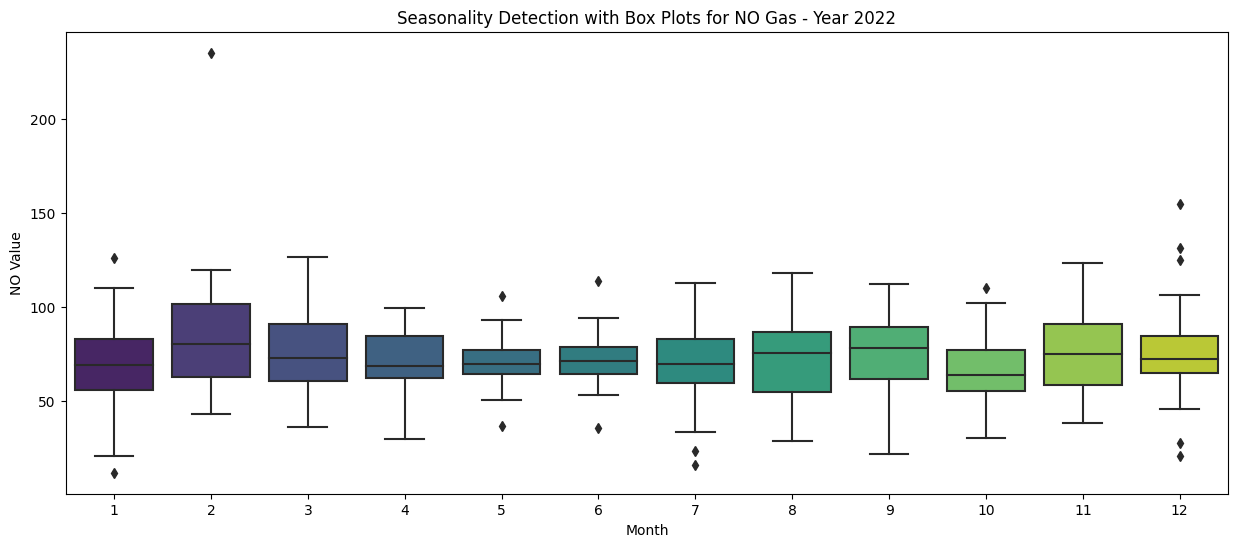

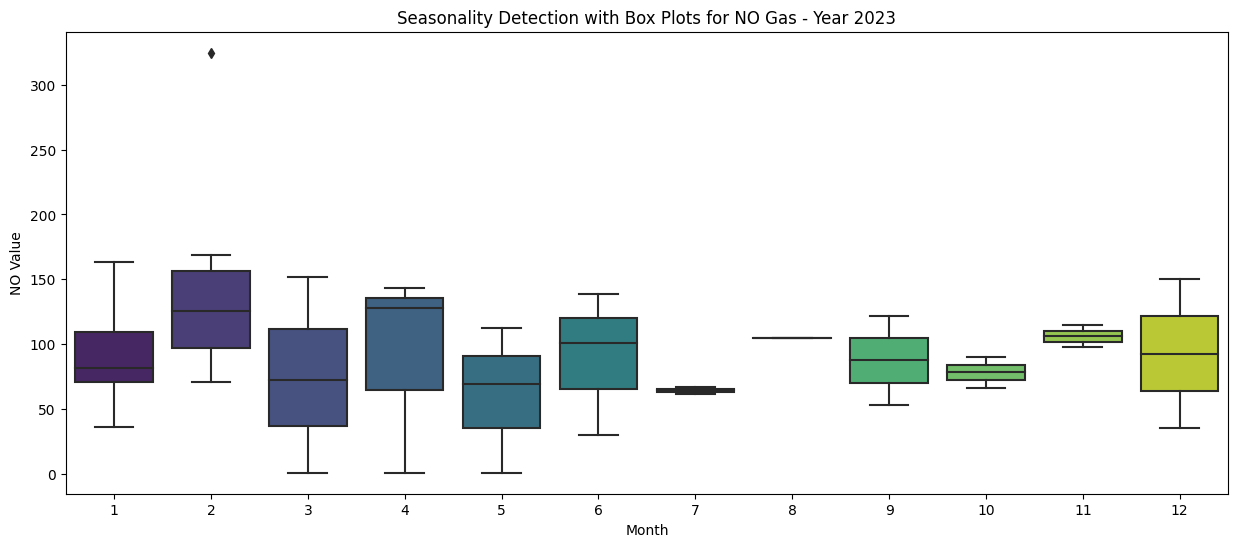

In [ ]:
import seaborn as sns
df['month'] = df.index.month
df['year'] = df.index.year

for year in df['year'].unique():
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='month', y='NO', data=df[df['year'] == year], palette='viridis')
    plt.title(f'Seasonality Detection with Box Plots for NO Gas - Year {year}')
    plt.xlabel('Month')
    plt.ylabel('NO Value')
    plt.show()

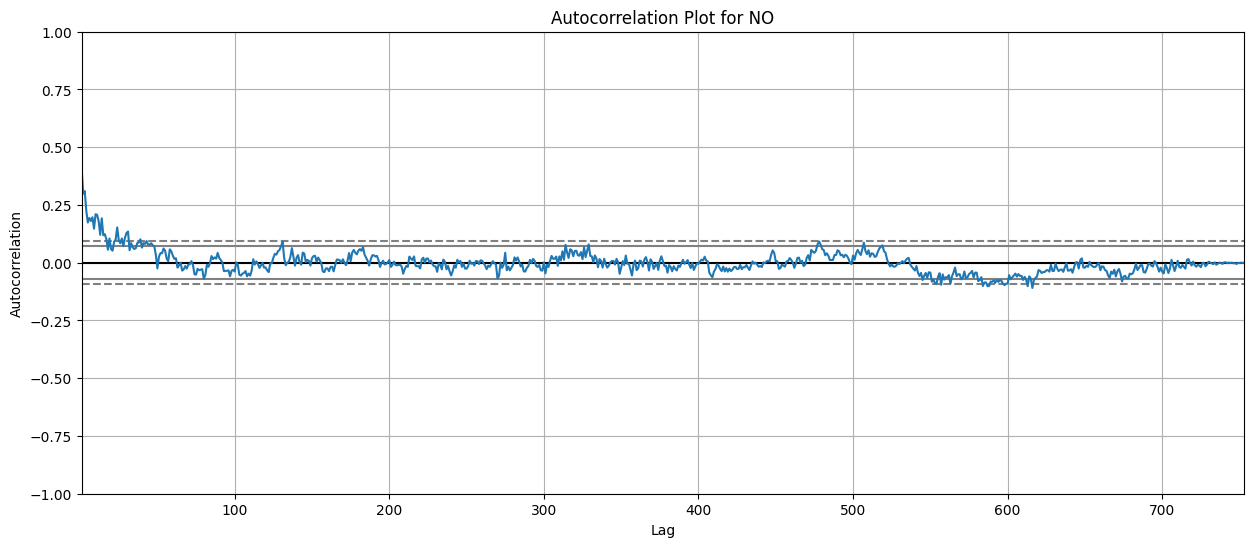

In [ ]:
from pandas.plotting import autocorrelation_plot

plt.rcParams.update({'figure.figsize': (15, 6)})
autocorrelation_plot(df['NO'].tolist())
plt.title('Autocorrelation Plot for NO')
plt.show()

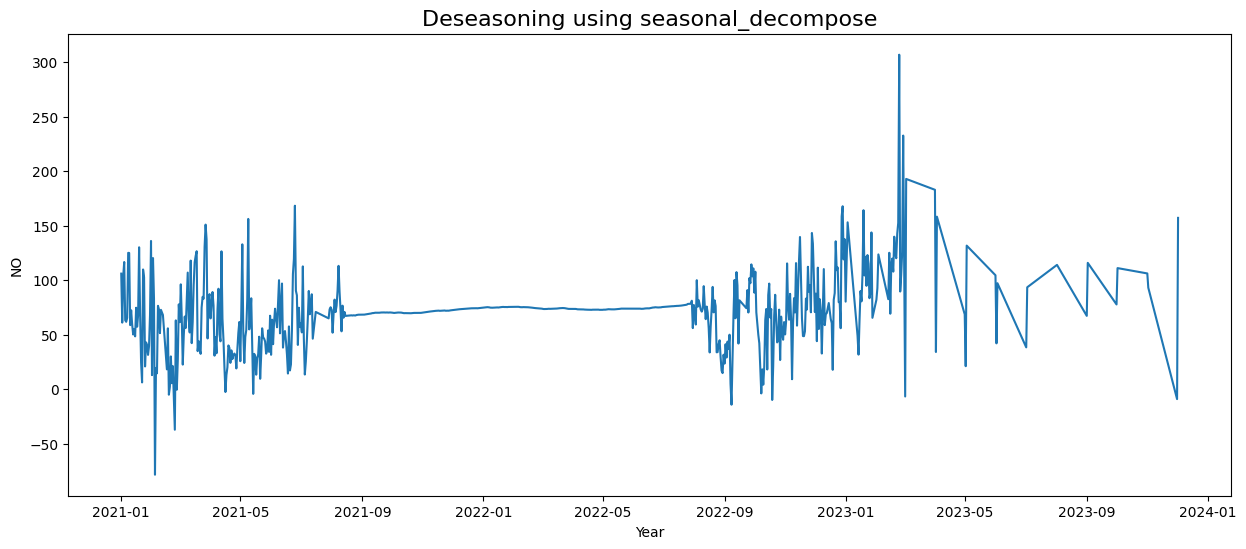

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

frequency = 365
res_mul = seasonal_decompose(df['NO'], model='additive', period=frequency)

deseason = df['NO'] - res_mul.seasonal
df['deaseason'] = deseason

plt.figure(figsize=(15, 6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('NO')
plt.show()

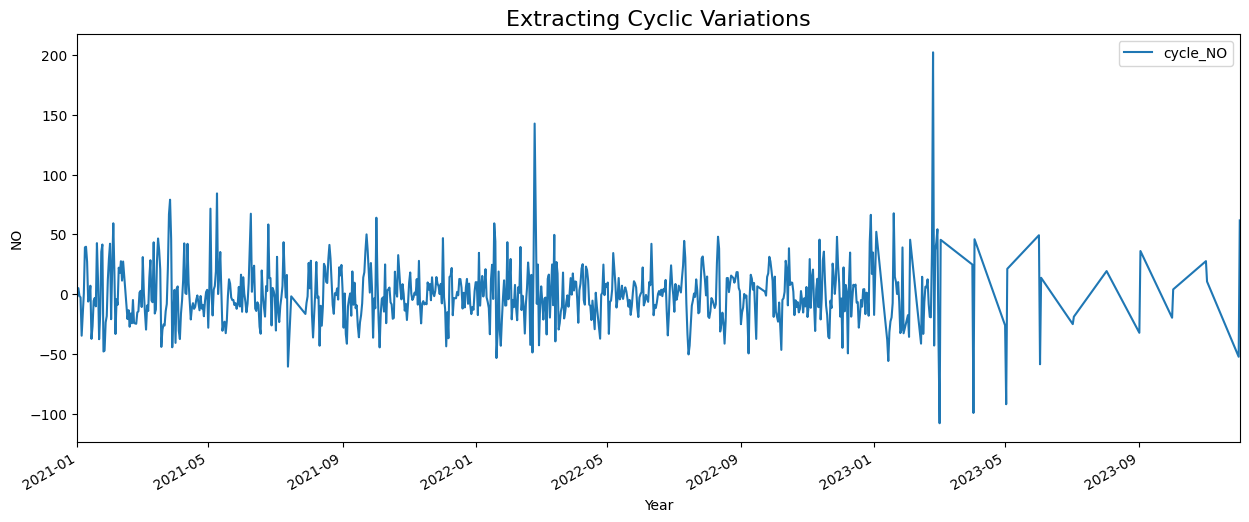

In [ ]:
cycle, trend = sm.tsa.filters.hpfilter(df['NO'], lamb=1600)
df['cycle_NO'] = cycle
df['trend_NO'] = trend

df[['cycle_NO']].plot(figsize=(15, 6)).autoscale(axis='x', tight=True)
plt.title('Extracting Cyclic Variations', fontsize=16)
plt.xlabel('Year')
plt.ylabel('NO')
plt.show()

### Exp 3

In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,TOT-RF,trend_NO,month,year,deaseason,cycle_NO
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.0,753.000000,753.000000,753.000000,753.000000,7.530000e+02
mean,39.807688,143.466619,71.133995,29.237994,100.349555,16.568142,9.843774,1.101036,25.976034,7.256913,0.0,71.133995,6.300133,2021.621514,71.397073,-3.898643e-13
std,23.688630,82.938494,30.018370,18.234421,36.405747,10.740399,5.703615,0.697142,15.687675,23.561452,0.0,15.138153,3.568883,0.628587,29.869083,2.481181e+01
min,2.444444,17.000000,0.825455,1.310000,23.020000,0.446667,0.010000,0.009286,0.053171,0.000000,0.0,36.984800,1.000000,2021.000000,-78.428701,-1.080632e+02
25%,18.588523,66.520789,53.635059,14.298947,77.695714,7.911143,6.718830,0.432353,16.379841,2.701231,0.0,64.423899,3.000000,2021.000000,64.956688,-1.349771e+01
50%,35.139785,132.583333,68.595222,25.739740,95.867363,15.254831,8.744070,1.076267,23.982353,3.529000,0.0,70.185428,6.000000,2022.000000,73.246852,-1.710529e+00
75%,57.613538,206.859886,84.462877,41.439048,118.073412,23.913261,12.356118,1.668356,32.659524,4.209130,0.0,76.716429,9.000000,2022.000000,75.607971,1.240472e+01
max,210.420745,638.546064,324.681333,105.965610,361.154889,82.789737,47.756471,3.416444,113.940000,324.510000,0.0,123.257982,12.000000,2023.000000,306.836638,2.023688e+02


In [ ]:
max_min_values = df.groupby('year')['NO'].agg(['max', 'min'])
df_filtered = df.groupby('year').apply(lambda group: group[(group['NO'] != group['NO'].max()) & (group['NO'] != group['NO'].min())])
df_filtered = df_filtered.drop('year', axis=1)
print(max_min_values)

             max        min
year                       
2021  160.197024   1.930000
2022  235.010000  11.636667
2023  324.681333   0.825455


In [ ]:
df_safe_range = df[(df['NO'] >= 0) & (df['NO'] <= 40)]
df_safe_range['NO']

From Date
2021-01-05    29.949844
2021-01-14    28.741818
2021-01-15    39.420133
2021-01-21    29.209787
2021-01-25    19.468852
                ...    
2023-03-02     0.826000
2023-04-02     0.825455
2023-05-02     0.966818
2023-06-02    29.643714
2023-12-01    35.332059
Name: NO, Length: 101, dtype: float64

In [ ]:
df_win = df.rolling(window=4).mean().head(10)
df_win

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,TOT-RF,trend_NO,month,year,deaseason,cycle_NO
From Date,,,,,,,,,,,,,,,,
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,57.584720,195.249552,63.528622,36.507655,100.037953,28.793544,13.621553,1.236996,40.860221,2.231842,0.0,63.780689,1.0,2021.0,96.946406,-0.252068
2021-01-05,43.001489,145.745587,55.653112,29.345779,85.000439,19.629259,10.828461,0.895878,32.295460,2.676389,0.0,64.164917,1.0,2021.0,86.253529,-8.511805
2021-01-06,31.196087,103.707607,50.305828,20.570038,70.876622,12.190227,9.871400,0.531714,23.128116,3.131402,0.0,64.549963,1.0,2021.0,86.436670,-14.244134
2021-01-07,23.278881,76.012084,51.148876,8.233020,59.381867,11.926763,10.352470,0.241943,18.030428,30.939597,0.0,64.930855,1.0,2021.0,76.815616,-13.781980
2021-01-08,16.155259,56.300823,61.986427,7.631320,69.588045,12.786901,10.210293,0.499607,16.197484,30.999304,0.0,65.293723,1.0,2021.0,78.920036,-3.307296
2021-01-09,13.341703,52.542219,80.917716,10.176783,91.064322,19.263158,13.071176,0.880350,14.319471,31.244065,0.0,65.616079,1.0,2021.0,94.348789,15.301637


In [ ]:
df_win.expanding(min_periods=4).mean().head(10)

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,TOT-RF,trend_NO,month,year,deaseason,cycle_NO
From Date,,,,,,,,,,,,,,,,
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07,38.765294,130.178707,55.159110,23.664123,78.824220,18.134948,11.168471,0.726633,28.578556,9.744808,0.0,64.356606,1.0,2021.0,86.613055,-9.197497
2021-01-08,34.243287,115.403131,56.524573,20.457562,76.976985,17.065339,10.976835,0.681228,26.102342,13.995707,0.0,64.544030,1.0,2021.0,85.074451,-8.019456
2021-01-09,30.759690,104.926312,60.590097,18.744099,79.324875,17.431642,11.325892,0.714415,24.138530,16.870433,0.0,64.722704,1.0,2021.0,86.620174,-4.132608


In [ ]:

df_win.ewm(com=0.5).mean().head(10)

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,TOT-RF,trend_NO,month,year,deaseason,cycle_NO
From Date,,,,,,,,,,,,,,,,
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,57.584720,195.249552,63.528622,36.507655,100.037953,28.793544,13.621553,1.236996,40.860221,2.231842,0.0,63.780689,1.0,2021.0,96.946406,-0.252068
2021-01-05,46.647297,158.121578,57.621990,31.136248,88.759817,21.920330,11.526734,0.981158,34.436651,2.565252,0.0,64.068860,1.0,2021.0,88.926748,-6.446871
2021-01-06,35.950305,120.450367,52.556955,23.821180,76.379144,15.184105,10.380733,0.670004,26.607665,2.957202,0.0,64.401931,1.0,2021.0,87.202848,-11.844976
2021-01-07,27.397094,90.454526,51.606502,13.299172,64.905982,12.985399,10.361656,0.381063,20.818030,21.845319,0.0,64.758955,1.0,2021.0,80.191466,-13.152453
2021-01-08,19.871568,67.591303,58.555047,9.504990,68.040255,12.852520,10.260330,0.460419,17.724937,27.973193,0.0,65.116940,1.0,2021.0,79.340343,-6.561893
2021-01-09,15.512345,57.544799,73.483972,9.953467,83.410717,17.132149,12.136801,0.740757,15.451508,30.156769,0.0,65.450157,1.0,2021.0,89.359718,8.033815


### Exp 4

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn import metrics


X = df['deseason']
test = X.iloc[-30:]
train = X.iloc[:-30]


KeyError: ignored

In [ ]:
X.shape

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') #how close a regression line is to a set of points.
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}') # average magnitude of the errors in a set of predictions.
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}') #square root of the avg of squared diff bet pred and actual obs
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}') #statistical measure of how accurate a forecast is.
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n') #proportion of variance in dependent variable by the independent variable

In [ ]:
resu = []
temp_df = pd.DataFrame()
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(30)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE'])

In [ ]:
fitSES = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 1.0,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

In [ ]:
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

In [ ]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(753, 783)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(753, 783)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 9]

# Assuming train and test have datetime indices
plt.plot(train, label='Train')
plt.plot(test, label='Test')
# plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized=True')
# plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')

# Convert the start date to a datetime object
start_date = '2021-01-01'
start_date_dt = pd.to_datetime(start_date)

# Set x-axis limits to start from the year 2021
plt.xlim(start_date_dt, None)

plt.legend(loc='best')
plt.show()


### Exp 5

In [ ]:
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot

# Assuming df is your DataFrame
result = adfuller(df['NO'])

# Displaying the ADF test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Plotting the 'NO' time series with labels, legend, and color
df['NO'].plot(figsize=(15, 6), color='brown', label='NO Time Series')
pyplot.title('Time Series Plot of NO')
pyplot.xlabel('Date')
pyplot.ylabel('AQI Levels')
pyplot.legend()
pyplot.show()


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def Augmented_Dickey_Fuller_Test_func(df, column_name):
    print(f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(df[column_name].dropna(), autolag='aic')

    dfoutput = pd.DataFrame(dftest[0:4], index=['Test Statistic', 'p-value', 'No Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

# Assuming df is your DataFrame and 'NO' is the column you want to analyze
Augmented_Dickey_Fuller_Test_func(df, 'NO')


### Exp 6

In [ ]:
!pip install pmdarima

In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

In [ ]:
df["NO"].plot(figsize=(15, 6))
plt.xlabel("Date")
plt.ylabel("NO - AQI Value")
plt.show()

In [ ]:
plt.figure(1, figsize=(15,6))
plt.subplot(211)
df["NO"].hist()
plt.subplot(212)
df["NO"].plot(kind='kde')
plt.show()

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
X = df[['NO']]
train, test = X[0:-30], X[-30:]

In [ ]:
stepwise_model = auto_arima(train,start_p=1, start_q=1,
    max_p=7, max_q=7, seasonal=False,
    d=None, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)

In [ ]:
stepwise_model.summary()

In [ ]:
summary = stepwise_model.summary()

summary_table = summary.tables[1]
summary_data = summary_table.data

print("Time Series Model Summary:")
print(f"\n{'Variable': <15}{'Coefficient': <15}{'Standard Error': <15}{'t-value': <15}{'P-value': <15}")
print("="*75)
for row in summary_data[1:]:
    variable, coef, std_err, t_value, p_value = row[:5]
    print(f"{variable: <15}{coef: <15}{std_err: <15}{t_value: <15}{p_value: <15}")

print("\nAdditional Information:")
print(f"AIC: {stepwise_model.aic}")
print(f"BIC: {stepwise_model.bic}")


In [ ]:
stepwise_model.plot_diagnostics(figsize=(15, 10))
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
predictions = stepwise_model.predict(n_periods=len(test))

# Calculate metrics
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - predictions) / test)) * 100
r2 = r2_score(test, predictions)

# Print or use the metrics as needed
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

In [ ]:
# Assuming 'stepwise_model' is your trained time series model

# Number of future time points to predict
future_periods = 10  # Adjust this as needed

# Make future predictions
future_predictions = stepwise_model.predict(n_periods=future_periods)

# Plot future predictions along with the existing data
stepwise_model.plot_diagnostics(figsize=(15, 10))
plt.title('Diagnostics Plot')
plt.show()

# Plot the existing data
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['NO'], label='Historical Data', color='blue')

# Plot the future predictions
future_index = pd.date_range(start=df.index[-1], periods=future_periods + 1, freq='D')[1:]
plt.plot(future_index, future_predictions, label='Future Predictions', color='red')

# Customize the plot
plt.title('Historical Data and Future Predictions of NO Levels')
plt.xlabel('Date')
plt.ylabel('NO Levels')
plt.legend()
plt.show()

# You can print or use the future_predictions as needed
print('Future Predictions:')
print(future_predictions)


### GARCH

In [ ]:
!pip install arch

In [ ]:
from arch import arch_model
df.index = pd.to_datetime(df.index)
returns = df['NO']
model = arch_model(returns, vol='Garch', p = 1, q = 1)
results = model.fit()

In [ ]:
print(results.summary)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

returns.index = pd.to_datetime(returns.index)

actual_volatility = returns[test_size:]

mse = mean_squared_error(actual_volatility, rolling_predictions)
mae = mean_absolute_error(actual_volatility, rolling_predictions)
rmse = sqrt(mse)
mape = np.mean(np.abs((actual_volatility - rolling_predictions) / actual_volatility)) * 100
r2 = r2_score(actual_volatility, rolling_predictions)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'R-squared (R2): {r2:.2f}')

In [ ]:
rolling_predictions = []
test_size = 50  # Adjust the test size as needed

for i in range(test_size, len(returns)):
    train = returns.iloc[:i]
    model = arch_model(train, vol='Garch', p=1, q=1)
    fit_model = model.fit(disp='off')
    pred = fit_model.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1, :][0]))

rolling_predictions = pd.Series(rolling_predictions, index=returns.index[test_size:])

# Plot true volatility and predicted volatility
plt.figure(figsize=(12, 6))
plt.plot(returns.index, returns, label='True Volatility', color='blue')
plt.plot(rolling_predictions.index, rolling_predictions, label='Predicted Volatility', color='red')
plt.title('Volatility Prediction with Rolling Forecast (GARCH(1,1))')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()